# Feature transformation

**1. What is Feature transformation?**
- `Feature transformation` is a mathematical transformation in which we apply a mathematical formula to a particular column(feature) and transform the values which are useful for our further analysis, so we can boost our model performance. It is also known as `Feature Engineering`, which create new features from existing features that may help in improving the model.
- New features may not have the same interpretation as the original features, but they may hace more explanatory power in a differenct space rather than in the original space
- **Feature transformation** can also used for **Feature Reduction** by `linear` combinations or `non-linear` function.
- Make ML algorithms to converge faster

**Why to do ?**

Example: The Linear or Logistic regression, assume that variables follow a normal distribution, but real variables in datasets will follow a skewed distribution. By applying some transformations to these skewed variables, we can map these distribution to a normal, so this can increase the performance

**2. Transformation Types**
- ***2.1. Function Transformation***
    - 2.1.1. `Log transformation`


In [101]:
# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [102]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import numpy as np

def diagnostic_plots(var, df, comp_df = None, qqplot = True, dist = 'norm', sparams = ()):
    """
    dist : distribution of qqplot
    sparams : parameter to determine the distribution, if it has
    """
    
    datas = [df] if comp_df is None else [df, comp_df]
    cols = 2 if qqplot else 1
    rows = 2 if (comp_df is not None) else 1
    subplot_titles = [f"Histogram of {var}"]
    if qqplot:
        subplot_titles = subplot_titles + [f"Q-Q plot of {var}"]
    if comp_df is not None:
        subplot_titles = [i + " (1st)" for i in subplot_titles] + [i + " (2nd)" for i in subplot_titles]
        
    fig = make_subplots(rows = rows, cols = cols , subplot_titles=subplot_titles)
    
    for i, data in enumerate(datas):
        fig.add_trace(go.Histogram(x = data[var]), row= i+1, col=1)
        if qqplot:
            qq = stats.probplot(data[var], dist = dist, sparams = sparams)
            x = np.array([qq[0][0][0], qq[0][0][-1]])
            fig.add_trace(go.Scatter(x=qq[0][0], y=qq[0][1], mode='markers'), row= i+1, col=2)
            fig.add_trace(go.Scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines'), row= i+1, col=2)
            
    fig.update_layout(autosize = True,height=rows*400, showlegend=False)#, width=cols*350
    fig.show(renderer="jpeg")

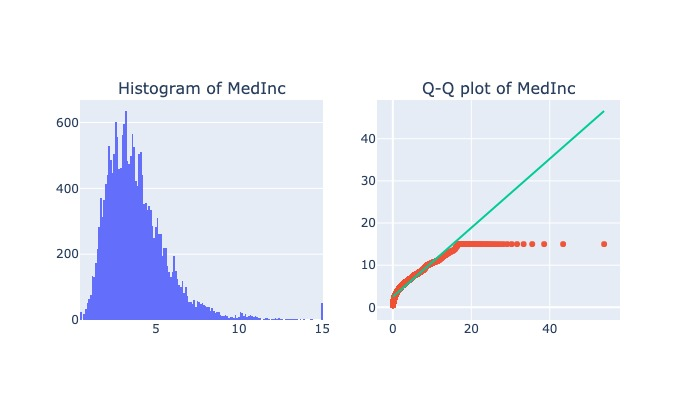

In [103]:
diagnostic_plots('MedInc', X, dist = 'lognorm', sparams = (1))

## Log transformation
$$\log X$$, with condition: X>0
- Generally, these transformations **make our data close to a normal distribution** but are not able to exactly abide by a normal distribution.
- This transformation is **not applied to those features which have negative values**., must be `X>0`
- This transformation is mostly applied to **right-skewed data**.
- Convert data from addictive Scale to multiplicative scale i,e, `linearly distributed data`.

In [104]:
import numpy as np
from feature_engine.transformation import LogTransformer, LogCpTransformer
from sklearn.preprocessing import FunctionTransformer

#sklearn
lt = FunctionTransformer(func=np.log, inverse_func=np.exp)

# simple log transform
lt = LogTransformer(variables=variables)

# because X trans need to be not negative, so add a minimized constant to the X to confirm X_new > 0
# set up the transformer to find the minimum value per variable, automatically.
lt_c = LogCpTransformer(variables=variables, C="auto")

# fit transformer to data set
lt_c.fit(X)

# the constant that will be added
lt_c.C_

{'MedInc': 1.4999,
 'AveRooms': 1.8461538461538463,
 'AveBedrms': 1.3333333333333333,
 'Population': 4.0}

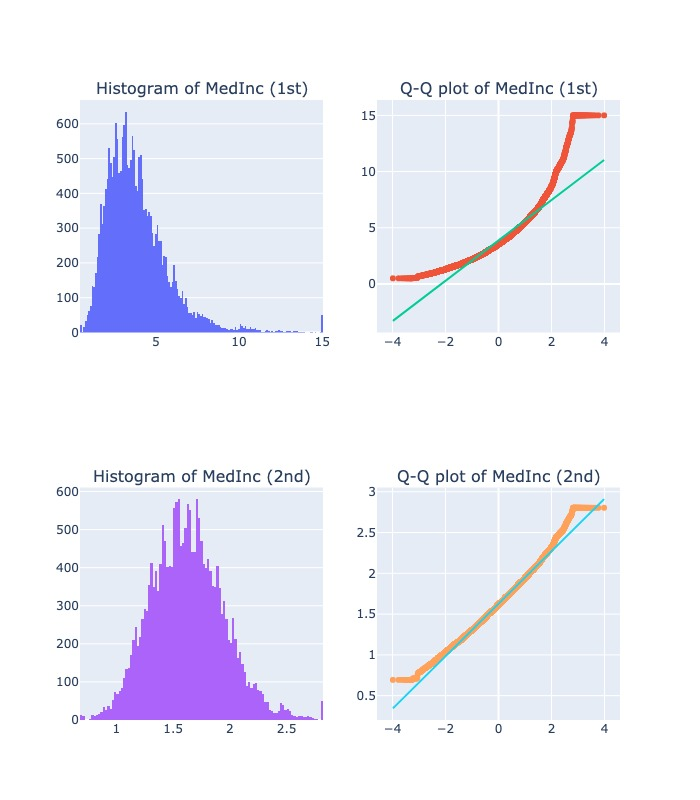

In [105]:
X_tf = lt_c.transform(X)

diagnostic_plots( "MedInc", X, X_tf)

## Reciprocal Transformation
$$\frac{1}{X}$$ with condition X!=0

- This transformation is **not defined for zero**.
- It is a powerful transformation with a `radical` effect.
- This transformation **reverses the order among values of the same sign**, so large values become smaller and vice-versa.

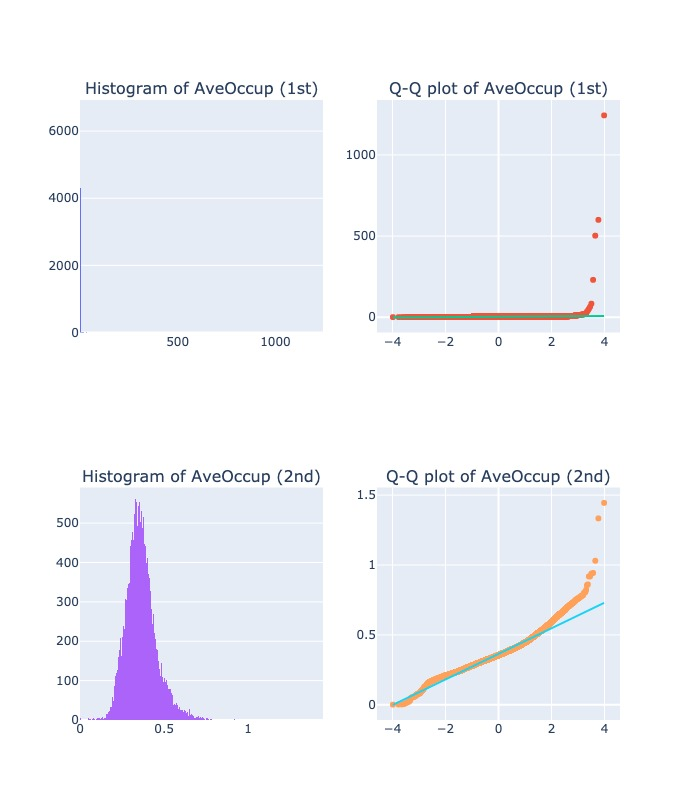

In [106]:
# sklearn
transformer = FunctionTransformer(func=np.reciprocal)

# feature_engine
from feature_engine.transformation import ReciprocalTransformer

rt = ReciprocalTransformer(variables="AveOccup")

# fit transformer to the entire dataframe
rt.fit(X)

# transform the selected variable in our data set
X_tf = rt.transform(X)

diagnostic_plots( "AveOccup", X, X_tf)

## Square Transformation
$$X^2$$
- This transformation mostly applies to left-skewed data.

In [107]:
# sklearn
transformer = FunctionTransformer(func=np.square)

## Square Root Transformation
$$\sqrt{X}$$
- This transformation is defined only for **positive numbers**.
- This transformation is **weaker than Log Transformation**.
- This can be used for reducing the skewness of right-skewed data.

<img src = "_images/06trans_square_root_trans.png">

In [108]:
# set up transformer with desired operations
transformer = FunctionTransformer(func=lambda x: np.round(np.sqrt(x), 2))

## Arcsin transformation
- An `arcsine transformation` can be used to “stretch out” data points that range between the values 0 and 1, when dealing with proportions and percentages.

In [127]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
fts = ['worst symmetry']
X_raw = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)[fts]
X_raw.describe()

,worst symmetry
count,569.000000
mean,0.290076
std,0.061867
min,0.156500
25%,0.250400
50%,0.282200
75%,0.317900
max,0.663800


/Users/khongdat/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:334: UserWarning:

With transform="pandas", `func` should return a DataFrame to follow the set_output API.



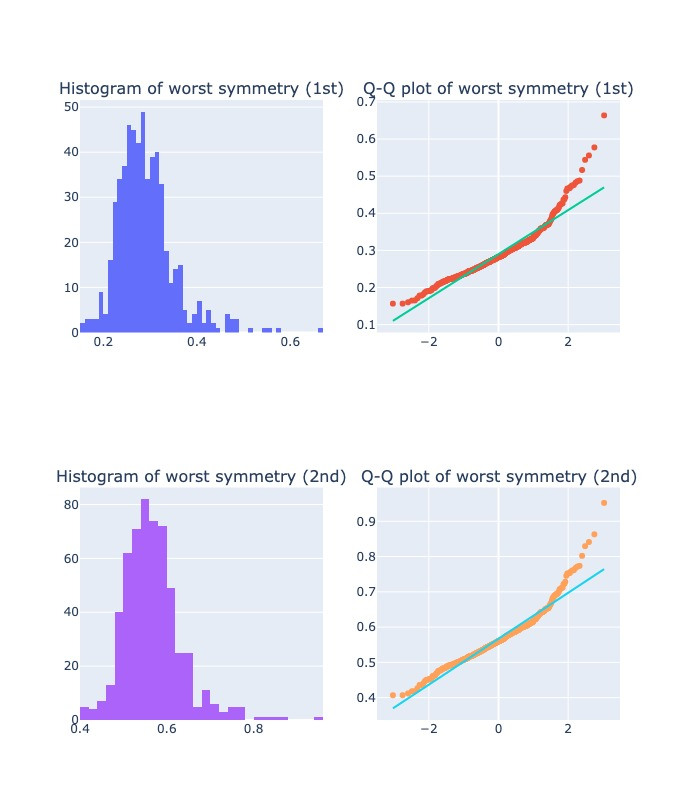

In [128]:
tf = FunctionTransformer(func=lambda x: np.arcsin(np.sqrt(x))).set_output(transform="pandas")
X_tra = tf.transform(X_raw)
diagnostic_plots( "worst symmetry", X_raw, X_tra)

## Power Transformation
- Power transforms are a family of parametric, monotonic transformations that make data more `Gaussian-like`. 
- The optimal parameter for **stabilizing variance and minimizing skewness** is estimated through maximum likelihood. 
- This is useful for modeling issues related to **non-constant variance** or other situations where normality is desired.
- `Power Transformer` supports the `Box-Cox transform` and the `Yeo-Johnson transform`.

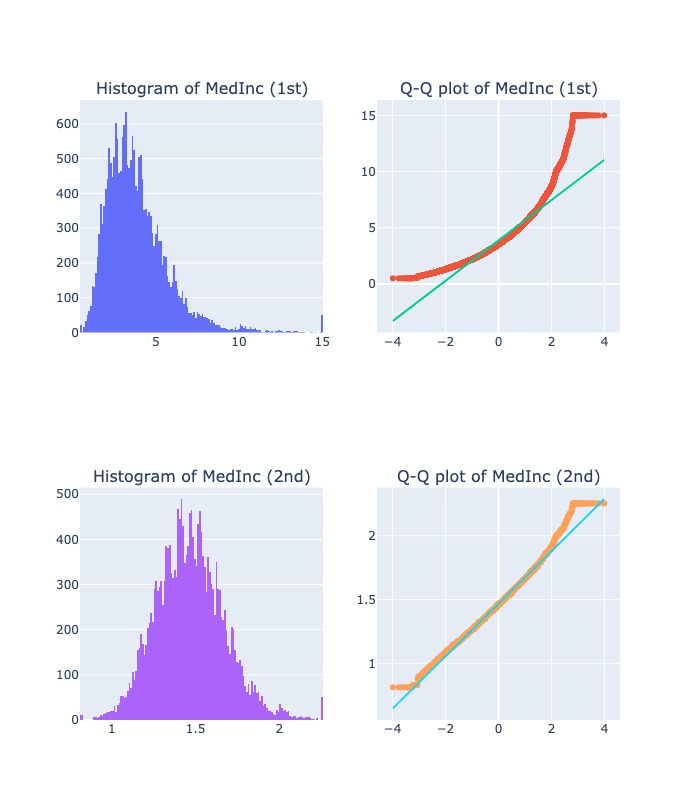

In [109]:
transformer = FunctionTransformer(lambda x: np.power(x, 0.3))
X_tf = transformer.transform(X[variables])
diagnostic_plots( "MedInc", X, X_tf)

## Box-Cox Transformation
$$x_{i}^{(\lambda)}=\left\{\begin{matrix}\frac{x_{i}^{\lambda}-1}{\lambda}&{{\mathrm{,if}\lambda\neq0}}\\ \\ \ln x_{i}&{{\mathrm{,if}\lambda=0}}\end{matrix}\right.$$

- Requires the X to be strictly positive (not even zero is acceptable).
- Use for transform into normal shape and stabilize the variance of variables
- When:
    - Large positive `λ`: with `x` high, then more higher.
    - Small negative `λ`: with `x` limit 0, then more negative

In [113]:
from sklearn.preprocessing import PowerTransformer

boxcox = PowerTransformer(method="box-cox", standardize=False).set_output(transform="pandas")

# fit transformer: transformer will learn the lambdas
boxcox.fit(X[['MedInc','HouseAge','AveRooms']])

# lambdas are stored in a transformer attribute
boxcox.lambdas_

array([ 0.09085449,  0.80939809, -0.2980049 ])

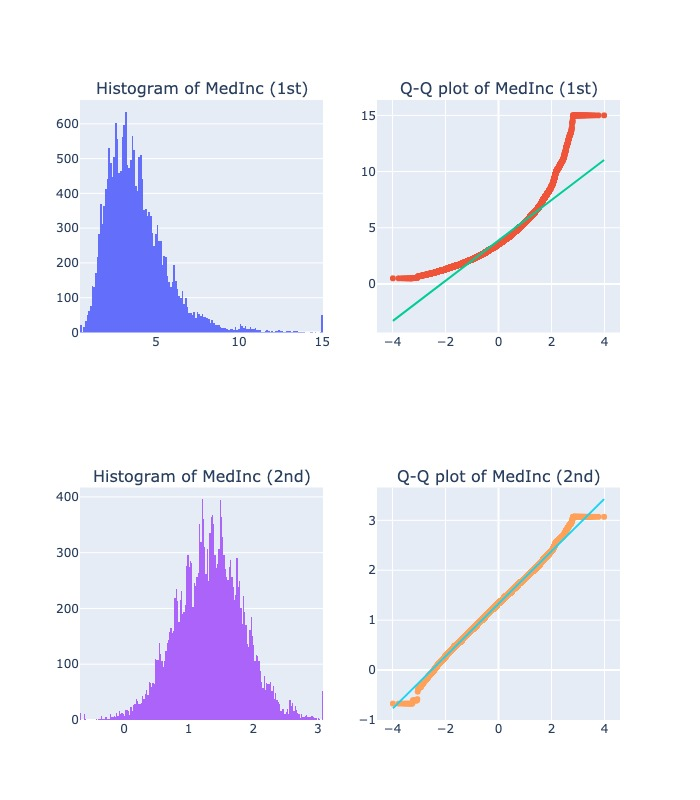

In [117]:
X_tf = boxcox.transform(X[['MedInc','HouseAge','AveRooms']])
diagnostic_plots( "MedInc", X, X_tf)

## Yeo-Johnson Transformation

<img src="_images/06trans_yeo1.png">

- Use to normalize data or when the data has outliers
- When:
    - Large positive `λ`: make distribution more right-skewd (suitable for left-skewd original distribution.
    - Small negative `λ`: make distribution more left-skewd (suitable for right-skewd original distribution.


<img src="_images/06trans_yeo2.png">


(The `Box–Cox` (left) and `Yeo–Johnson` (right) transformations with `x` is original and `y` is transformed)

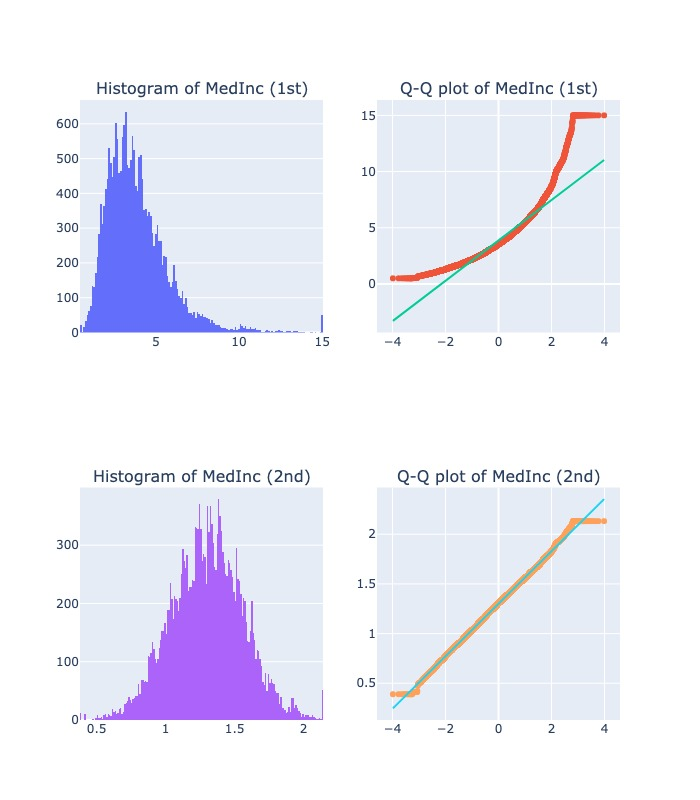

In [119]:
from sklearn.preprocessing import PowerTransformer

yeo = PowerTransformer(method="yeo-johnson", standardize=False).set_output(transform="pandas")

# fit transformer: transformer will learn the lambdas
yeo.fit(X[['MedInc','HouseAge','AveRooms']])

# lambdas are stored in a transformer attribute
yeo.lambdas_

X_tf = yeo.transform(X[['MedInc','HouseAge','AveRooms']])
diagnostic_plots( "MedInc", X, X_tf)

## Quantile Transformation

When working with categorical models: Some machine learning models, such as decision trees and naive Bayes classifiers, are designed to work with categorical variables. Discretizing continuous variables can help these models perform better.

When dealing with sparse data: In some datasets, certain values of a continuous variable may be rare or non-existent. Discretization can help address this issue by grouping together similar values and reducing the sparsity of the data.

When reducing complexity: Discretization can simplify the feature space by reducing the number of possible values that a feature can take on. This can make it easier to build models and reduce the risk of overfitting.

When improving interpretability: Discretization can make it easier to interpret the relationship between a feature and the target variable. For example, if we discretize age into categories like "young", "middle-aged", and "old", we can more easily see how age affects the outcome variable.